In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn import metrics

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import time

In [2]:
def plot_learner(train_sizes, train_scores, test_scores, label_train,label_test, title, xlabel, ylabel, filename):
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label=label_train)
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=label_test)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(filename)
    plt.show()

In [3]:
def import_data():
    df_ds1 = pd.read_csv("winequality-red.csv", sep=";") # .append(pd.read_csv("winequality-white.csv", sep=";"))
    missing_values = ['?']
    df_ds2 = pd.read_csv("breast-cancer-wisconsin.csv", sep=",",na_values = missing_values)
    df_ds2.fillna(method='ffill',inplace=True)
    X_ds1 = np.array(df_ds1.values[:,1:-1])
    y_ds1 = np.array(df_ds1.values[:,-1])
    y_ds1 = (y_ds1<7).astype(int)
    X_ds2 = np.array(df_ds2.values[:,1:-1])
    y_ds2 = np.array(df_ds2.values[:,-1])
    return X_ds1, y_ds1, X_ds2, y_ds2

In [4]:
def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.25)
    sc = preprocessing.StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

In [5]:
def decision_learner(X_train, X_test, y_train, y_test):
    __clf_dt = tree.DecisionTreeClassifier(random_state=18)
    print(__clf_dt)
    __clf_dt.fit(X_train, y_train)
    y_pred = __clf_dt.predict(X_test)
    
    dt_accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Decision Tree - Accuracy of decision tree: ',dt_accuracy*100)
    return __clf_dt

In [6]:
def plot_dt_validation_curve(clf_dt, X_train, y_train,filename):
    depth_range = np.arange(1,31,1)
    train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_name="max_depth", param_range=depth_range, cv=5)
    plot_learner(depth_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation Curve for Decision Tree', 'Max Depth',  'Score', filename)


In [7]:
def set_dt_hyperparameters(clf_dt, X_train, y_train,X_test):
    param_grid = [{ 'max_depth':np.arange(7,25,0.5)}]
    clf_dt = GridSearchCV(clf_dt, param_grid=param_grid, cv=5)
    clf_dt.fit(X_train, y_train)
    clf_dt_ = clf_dt
    print("Decision Traa - Best Parameters: ", clf_dt.best_params_)
    y_pred = clf_dt.predict(X_test)
    print('Decision Tree - Accuracy: ' , (metrics.accuracy_score(y_test, y_pred) * 100))
    return clf_dt_.best_params_

In [8]:
def plot_dt_learning_curve(clf_dt_best_params_, X_train, y_train,filename):
    max_depth = clf_dt_best_params_['max_depth']
    #min_samples_leaf = clf_dt_best_params_['min_samples_leaf']
    __clf_lc_dt = tree.DecisionTreeClassifier(random_state=18,max_depth = 6)
    print(__clf_lc_dt)
    train_sizes = np.linspace(0.3, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(__clf_lc_dt, X_train, y_train,train_sizes=train_sizes, cv=5,random_state=18)
    plot_learner(train_sizes,train_scores, test_scores,'Training score', 'Cross-validation score','Learning Curve for Decision Tree', 'Training Eamples',  'Score', filename)


In [9]:
X_ds1, y_ds1, X_ds2, y_ds2 = import_data()

In [10]:
X_train, X_test, y_train, y_test = train_test(X_ds1, y_ds1)

In [11]:
clf_dt1 = decision_learner(X_train, X_test, y_train, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=18, splitter='best')
Decision Tree - Accuracy of decision tree:  89.75


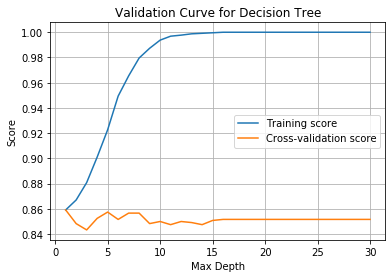

In [12]:
plot_dt_validation_curve(clf_dt1, X_train, y_train,'decision_tree_validation_curve_1-100.png')

In [13]:
estimator_param_dt1 = set_dt_hyperparameters(clf_dt1, X_train, y_train,X_test)

Decision Traa - Best Parameters:  {'max_depth': 7.0}
Decision Tree - Accuracy:  88.0


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=18, splitter='best')


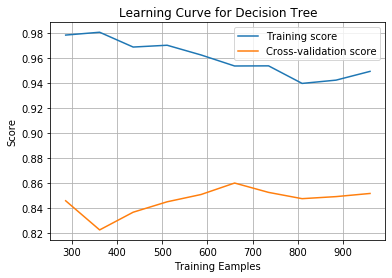

In [14]:
plot_dt_learning_curve(estimator_param_dt1, X_train, y_train,'decision_tree_learning_curve_1-100.png')

In [15]:
X_train, X_test, y_train, y_test = train_test(X_ds2, y_ds2)

In [16]:
clf_dt2 = decision_learner(X_train, X_test, y_train, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=18, splitter='best')
Decision Tree - Accuracy of decision tree:  95.42857142857143


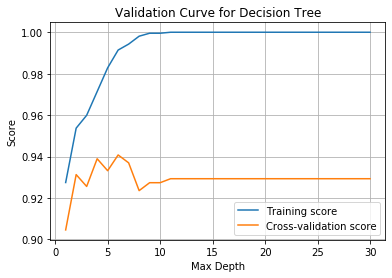

In [17]:
plot_dt_validation_curve(clf_dt2, X_train, y_train,'decision_tree_validation_curve_1-100.png')

In [18]:
estimator_param_dt2 = set_dt_hyperparameters(clf_dt2, X_train, y_train,X_test)

Decision Traa - Best Parameters:  {'max_depth': 7.0}
Decision Tree - Accuracy:  95.42857142857143


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=18, splitter='best')


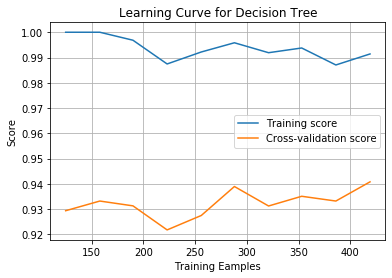

In [19]:
plot_dt_learning_curve(estimator_param_dt2, X_train, y_train,'decision_tree_learning_curve_2-100.png')